In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
file = '../database/publication_database.csv'
images = '../publication_images'
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')
model_names

['xu_1999_ill+gt',
 'ys_08_lowT_mj_gt',
 'ys_08_highT_mj_gt',
 'ys_08_mixedT_mj_gt',
 'ys_08_morb_mj_gt',
 'dai_09_wet_gt',
 'dai_09_dry_gt',
 'dai_12_dry_gt',
 'dai_12_wet_gt',
 'dai_13_alm_dry_gt',
 'Liu_19_gt',
 'Liu_21_gt']

# Exploring Pyrrhenious's Garnet Models Database Correspondence

Here we look at the garnet models parameterization correspondence of:

 * Xu S. and Shankland Thomas J., 1999. Electrical conductivity of orthopyroxene and its high pressure phases

 * Yoshino et al., 2008. Electrical conductivity of majorite garnet and its implications for electrical structure in the mantle transition zone
 
 * Dai K. and Karato S. 2009. Electrical conductivity of pyrope-rich garnet at high temperature and high pressure
 
 * Dai et al., 2012. The effect of chemical composition and oxygen fugacity on the electrical conductivity of dry and hydrous garnet at high temperatures and pressures
 
 * Dai et al., 2013. Electrical conductivity of Alm82Py15Grs3 almandine-rich garnet determined by impedance spectroscopy at high temperatures and high pressures.
 
 * Liu et al., 2019. Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content
 
 * Liu et al., 2021. Electrical conductivity of omphacite and garnet indicates limited deep water recycling by crust subduction.
 
Some authors (e.g. Romano et al., 2006) do not provide universal parameterizations which explain the majority of the reported data. In other cases, (e.g. Dai et al.,'s) 'universal' fits do not exactly match the linear fits shown on the graph. Some parameter fits (e.g. Yoshino et al., 2008) had to be adjusted slightly in order to overly the linear regressions shown on the publication images. Finally, in some cases (e.g. Yoshino et al., 2008) a combination of reported low and high temperature mechanisms was created by adjusting preexponential constants to match trends seen in the figures. 
 
 
## Xu and Shankland 1999
 

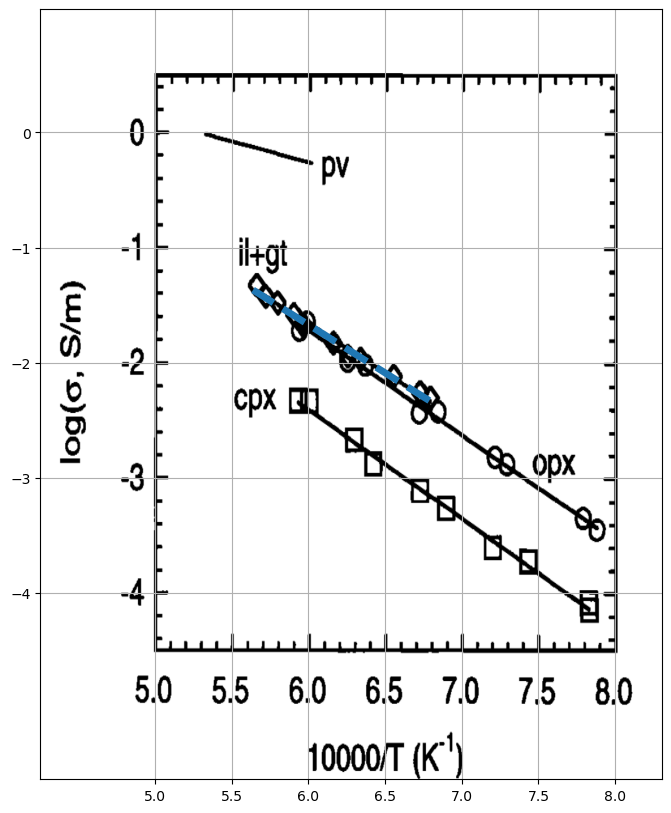

In [2]:
model = 'xu_1999_ill+gt'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity4 = model.get_conductivity(T=temperature_range)
    ax.plot(1e4/temperature_range,np.log10(conductivity4),linestyle='--',linewidth=5)

## Yoshino et al., 2008

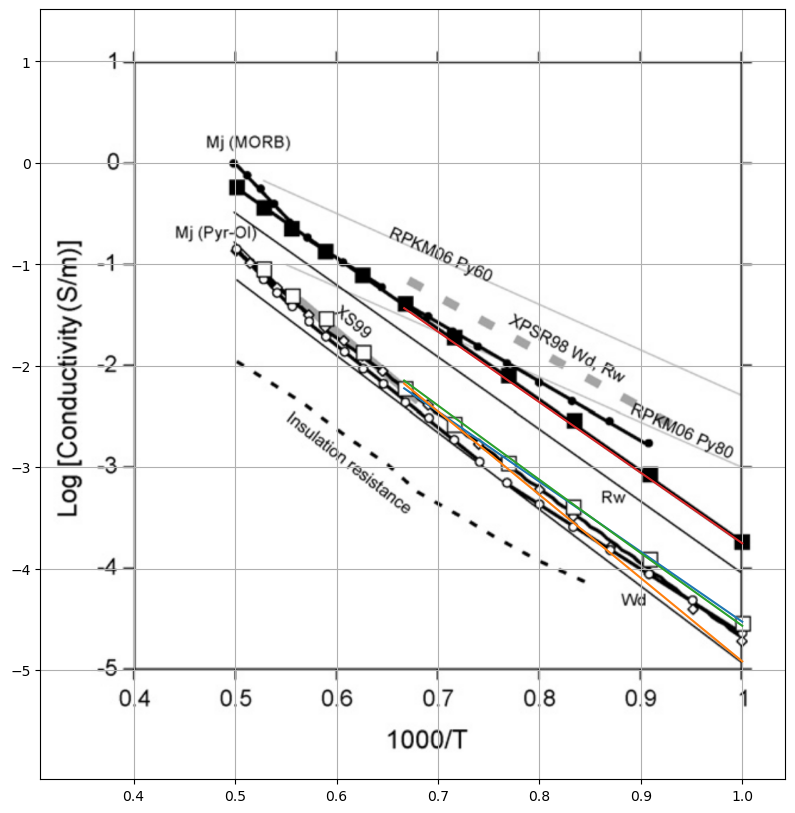

In [3]:
models =['ys_08_lowT_mj_gt',
 'ys_08_highT_mj_gt',
 'ys_08_mixedT_mj_gt',
 'ys_08_morb_mj_gt']
ec_model_row = ecdatabase.get_model_properties(models[0])
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in models:
        ec_model_row = ecdatabase.get_model_properties(models[0])
        temperature_range = 1e3/np.linspace(1e3/ec_model_row['temp_max'],
                                        1e3/ec_model_row['temp_min'],num=100,dtype=float).ravel()
        ecmodel = ecdatabase.get_model(model)
        conductivity1 =ecmodel.get_conductivity(T=temperature_range)
   
        ax.plot(1e3/temperature_range,np.log10(conductivity1))
    

## Dai K. and Karato S. 2009

dai_09_wet_gt:{Cw^0.63(0.19) 1000(7.0000E+02) exp(-(0.83(0.051821) + P-0.57(0.05))/kT)}


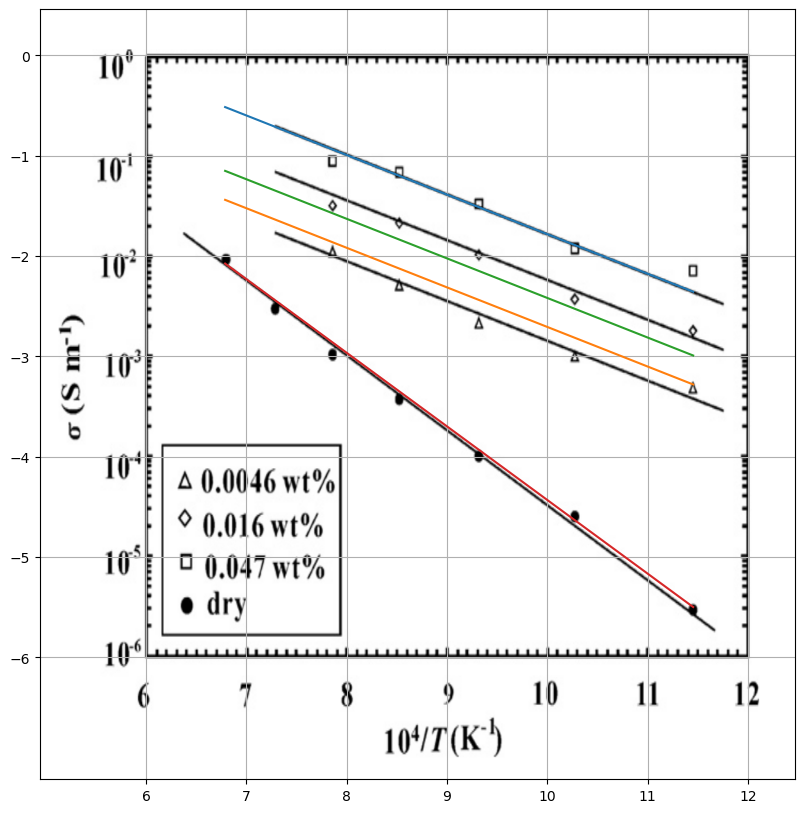

In [4]:
models = ['dai_09_wet_gt','dai_09_dry_gt']
ecdatabase = database.Database(file)

ec_model_row = ecdatabase.get_model_properties(models[0])
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(873,1473,num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in models:
        ecmodel = ecdatabase.get_model(model)
        if 'wet' in model:
            ecmodel.mechanisms[0].preexp.mean=1000
            ecmodel.mechanisms[0].enthalpy.mean=0.83
            ecmodel.mechanisms[0].const1.mean=0.63
            print(ecmodel)
            for water in [0.047,0.0016,0.0046]:
                conductivity1 = ecmodel.get_conductivity(T=temperature_range,P=8,Cw=water*1e4)
                ax.plot(1e4/temperature_range,np.log10(conductivity1))
        else:
            conductivity1 = ecmodel.get_conductivity(T=temperature_range,P=5)
            ax.plot(1e4/temperature_range,np.log10(conductivity1))

## Dai et al., 2012

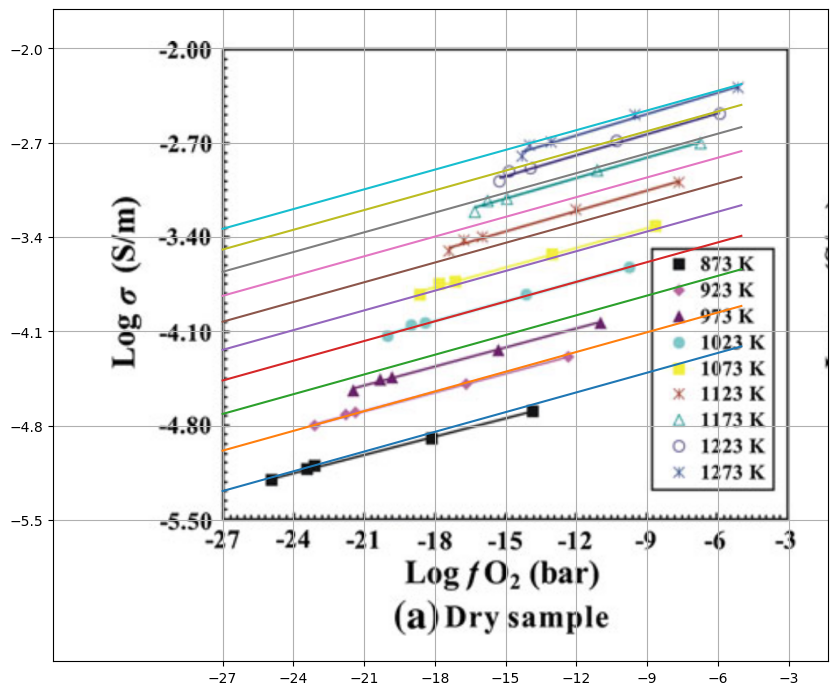

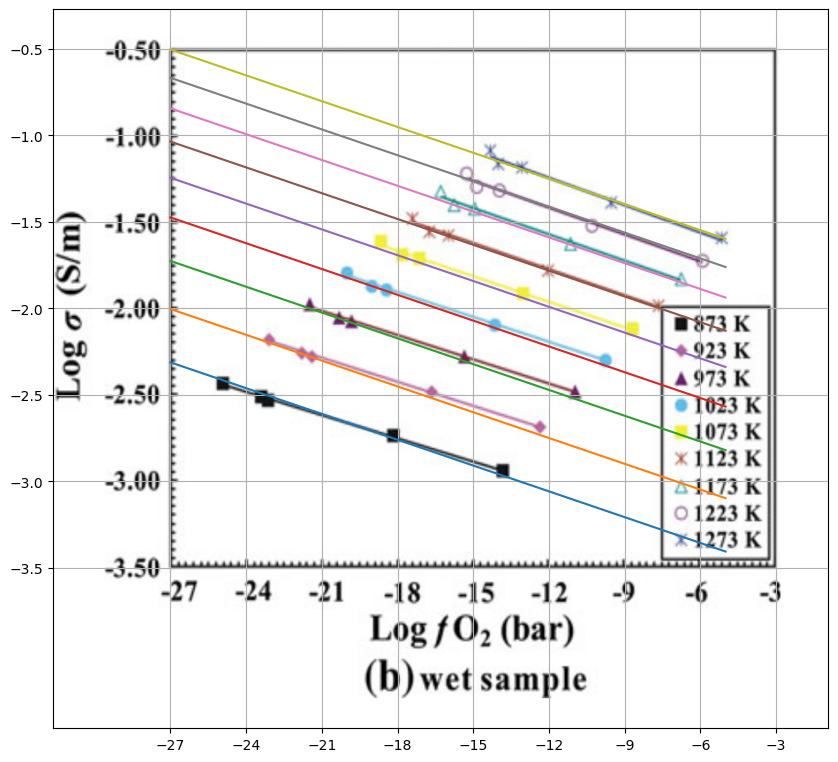

In [5]:
model = 'dai_12_wet_gt'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
model = ecdatabase.get_model('dai_12_dry_gt')
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    logfO2 = np.linspace(-27,-5,num=100)
    if i==0:
        fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
        for T in np.arange(873,1373,50)+110:
            conductivity1 = model.get_conductivity(T=T,logfo2=logfO2*8e-1)
            ax.plot(logfO2,np.log10(conductivity1))
            
model = 'dai_12_wet_gt'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    logfO2 = np.linspace(-27,-5,num=100)
    if i==1:
        fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
        for T in np.arange(973,1473,60)+120:
            conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=T,logfo2=logfO2*7e-1)
            ax.plot(logfO2,np.log10(conductivity1))

## Dai et al., 2013

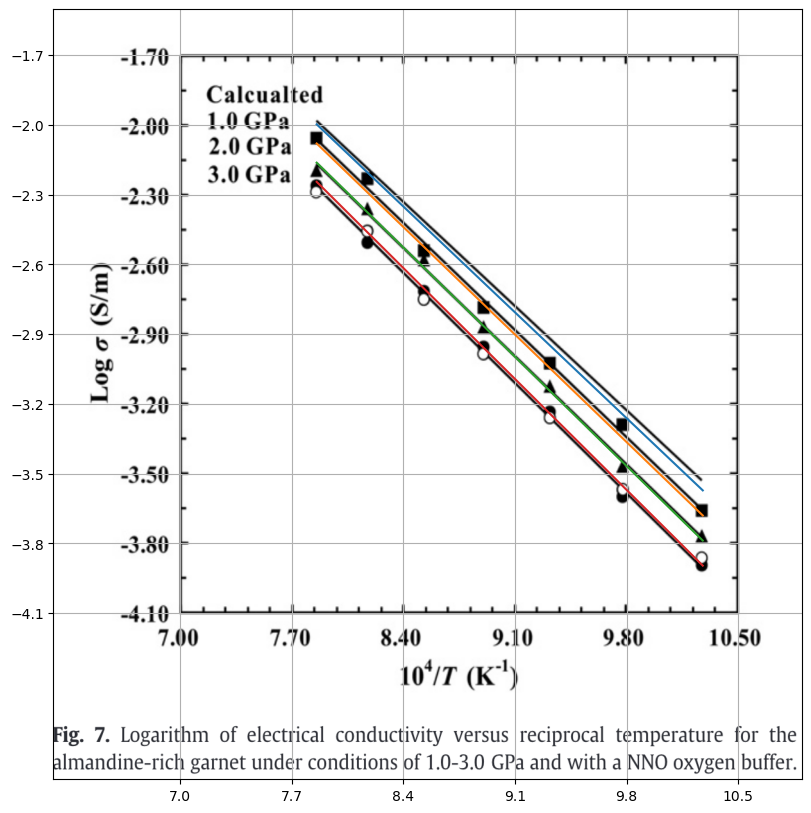

In [6]:
model = 'dai_13_alm_dry_gt'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
        fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
        for P in [0,1,2,3]:
            conductivity1 = ecdatabase.get_model(model).get_conductivity(T=temperature_range,P=P)
            ax.plot(1e4/temperature_range,np.log10(conductivity1))

##  Liu et al., 2019

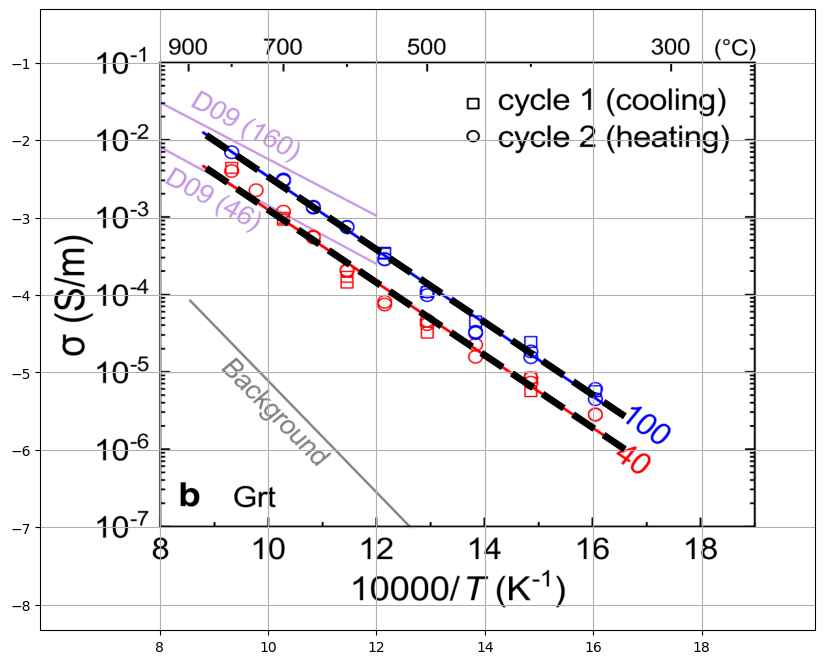

In [7]:
model = 'Liu_19_gt'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min']-20,ec_model_row['temp_max']+75,num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)

for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    
    conductivity1 = model.get_conductivity(T=temperature_range,Cw=40)
    conductivity2 = model.get_conductivity(T=temperature_range,Cw=100)
    ax.plot(1e4/temperature_range,np.log10(conductivity1),color='black',linestyle='--',linewidth=5)
    ax.plot(1e4/temperature_range,np.log10(conductivity2),color='black',linestyle='--',linewidth=5)
    break


## Liu et al., 2021

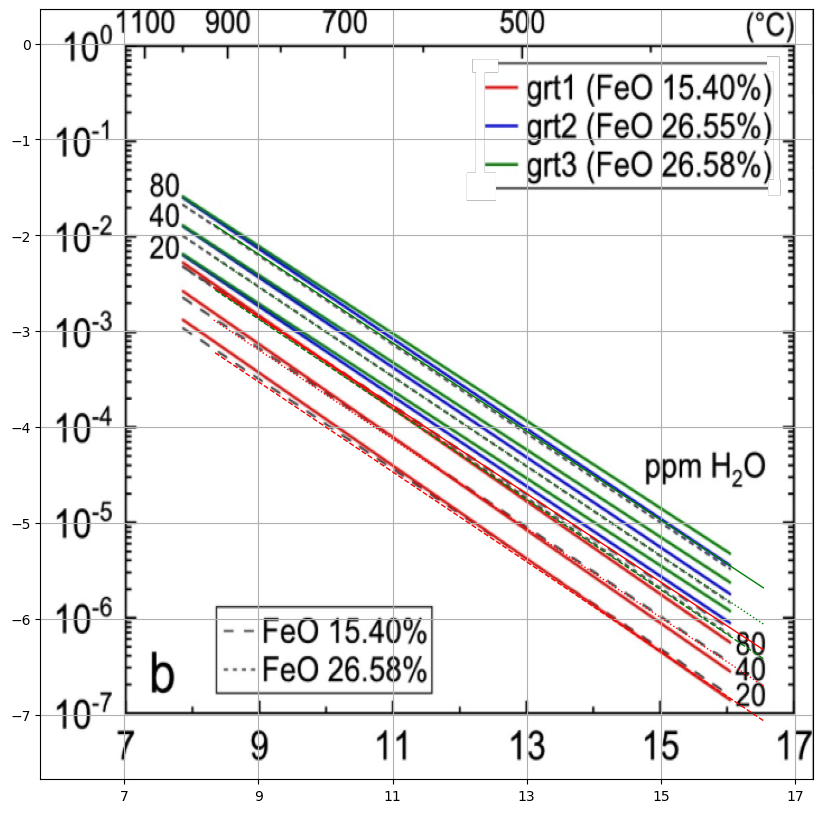

In [13]:
model = 'Liu_21_gt'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min']-20,ec_model_row['temp_max']+75,num=100,dtype=float).ravel()
ecdatabase = database.Database(file)
    
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    
    iron_number2 = np.asarray([0.7463365, 0.90419798] )
    ecmodel = ecdatabase.get_model(model)
    for fei, iron in enumerate(iron_number2):
        for wi, water in enumerate([20,40,80]):

            c = ecmodel.get_conductivity(T=temperature_range,Cw=water,X_fe=iron)

            ax.plot(1e4/temperature_range,np.log10(c),linewidth=1,
                    color=['red','green','blue'][fei],linestyle=['--',':','-'][wi])
           